In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from IPython.display import display
from PIL import Image

PATH = '/content/drive/MyDrive/Documents/Colab Notebooks/PythonForFinance/'

Mounted at /content/drive


Remember the house price example? Well there are usually more variables than house size that affect the house price such as location, neighborhood, etc. Therefore, a regression that considers multiple variables should provide a more accurate prediction - given that you're using the right variables

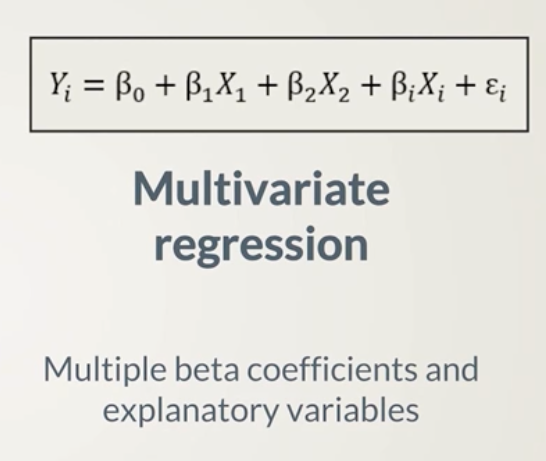

In [2]:
img = Image.open(PATH + 'assets/multivariate_regression.png')
display(img)

Just like the linear regression, a multivariate regression is a best fitting line the minimizes the sum of the squared residuals, this time in more dimensions rather than just 2. Re-enter: R<sup>2</sup>

R<sup>2</sup> helps us determine how powerful the regression is. It's value is always between 0-1, and the higher the number of variables: the higher the R<sup>2</sup>.

How to check if an explanatory variable improves a model's predictive power?
- Run a regression with the variable
- Run a regression without the variable
- See which regression had a higher R<sup>2</sup>. If it was the former, then the variable in question has good predictive power, and reverse if it's the latter

Alternatively, you can compare the p-values of beta coefficients (the probability that the beta coefficients should have been different)
- Low P-value means there's a low chance that the beta coefficients are different than estimated (specifically below p-value <= 0.05)
- High p-value means the beta may have occured by chance and we might conclude there's no strong evidence that this variable predicts the other
- Said a different way, a p-value lower than 5% allows us to state: "We can be 95% confident that the beta coefficient we've estimated is different than 0"

Note: Beta coefficients estimated in a multivariate regression can be interpreted as the marginal impact of the explanatory variable

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [4]:
data = pd.read_excel(PATH + 'PythonForFinanceCourseMaterials/S16 - Part II Finance - Multivariate Regression Analysis/Housing (2).xlsx')
data

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995
5,1010000,1850,IN,7,1998
6,600000,1000,IN,4,2015
7,700000,1100,LA,4,2014
8,1100000,1600,LA,7,2017
9,570000,1000,NY,5,1997


### Multivariate Regression:

Independent Variables: House size, num rooms, year of construction

In [5]:
X = data[['House Size (sq.ft.)', 'Number of Rooms', 'Year of Construction']] # [[]] b/c scikit-learn expects X.shape = (n_samples, n_features) i.e. multidimensional, not just a series/list
Y = data['House Price']

In [6]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     14.90
Date:                Wed, 02 Jul 2025   Prob (F-statistic):           6.82e-05
Time:                        11:53:12   Log-Likelihood:                -258.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      16   BIC:                             528.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9.452e+06    5.4e+06     -1.752      0.099   -2.09e+07    1.99e+06
House Size (sq.ft.)    341.8271    179.666      1.903      0.075     -39.049     722.703
Number of Rooms        1.16e+04   3.74e+04      0.310      0.760   -6.77e+04    9.08e+04
Year of Construction  4863.5761   2697.969      1.803      0.090    -855.862    1.06e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.747
Skew:                          -0.676   Prob(JB):                        0.418
Kurtosis:                       2.484   Cond. No.                     5.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Independent Variables: House size, num rooms

In [9]:
X = data[['House Size (sq.ft.)', 'Number of Rooms']]
Y = data['House Price']

In [10]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     18.30
Date:                Wed, 02 Jul 2025   Prob (F-statistic):           5.77e-05
Time:                        11:56:10   Log-Likelihood:                -260.28
No. Observations:                  20   AIC:                             526.6
Df Residuals:                      17   BIC:                             529.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.737e+05   1.03e+05      2.655      0.017    5.62e+04    4.91e+05
House Size (sq.ft.)   314.1363    190.485      1.649      0.117     -87.752     716.025
Number of Rooms      1.944e+04   3.95e+04      0.492      0.629   -6.39e+04    1.03e+05
==============================================================================
Omnibus:                        1.326   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.515   Jarque-Bera (JB):                0.810
Skew:                          -0.487   Prob(JB):                        0.667
Kurtosis:                       2.853   Cond. No.                     5.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Independent Variables: House Size and Year of Construction

In [11]:
X = data[['House Size (sq.ft.)', 'Year of Construction']]
Y = data['House Price']

X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     23.55
Date:                Wed, 02 Jul 2025   Prob (F-statistic):           1.26e-05
Time:                        13:08:14   Log-Likelihood:                -258.49
No. Observations:                  20   AIC:                             523.0
Df Residuals:                      17   BIC:                             526.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9.654e+06   5.21e+06     -1.852      0.081   -2.07e+07    1.34e+06
House Size (sq.ft.)    394.0417     61.098      6.449      0.000     265.137     522.947
Year of Construction  4960.9407   2607.443      1.903      0.074    -540.283    1.05e+04
==============================================================================
Omnibus:                        2.064   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.356   Jarque-Bera (JB):                1.689
Skew:                          -0.663   Prob(JB):                        0.430
Kurtosis:                       2.480   Cond. No.                     5.36e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Independent Variables: Number of Rooms and Year of Construction

In [12]:
X = data[['Number of Rooms', 'Year of Construction']]
Y = data['House Price']

X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     17.79
Date:                Wed, 02 Jul 2025   Prob (F-statistic):           6.79e-05
Time:                        13:09:59   Log-Likelihood:                -260.47
No. Observations:                  20   AIC:                             526.9
Df Residuals:                      17   BIC:                             529.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8.471e+06   5.77e+06     -1.468      0.160   -2.06e+07     3.7e+06
Number of Rooms       7.824e+04    1.4e+04      5.574      0.000    4.86e+04    1.08e+05
Year of Construction  4424.7160   2887.793      1.532      0.144   -1667.996    1.05e+04
==============================================================================
Omnibus:                        2.115   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.347   Jarque-Bera (JB):                1.400
Skew:                          -0.407   Prob(JB):                        0.497
Kurtosis:                       1.991   Cond. No.                     4.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After running the four regressions (all 3 together, 1+2, 2+3, 1+3), we can see the p-values for year of construction were above .05 (5%) while number of rooms and house size were sometimes almost 0. That said, when we ran the regression with just those two variables, their p-values rose significantly. So, we cannot say for certain that these independent variables are that significant to our dependant variable. That said, this has shown us things useful for futre experiments like:
- If we gather more data/observations, the p-value of house size and num of rooms might decrease
    - This is because our r-squared value indicates we've got decent predictive power. When you combine that with the higher p-values, we get a picture that's something like: house size and num of rooms play a decent part in determining house price, just not the whole of the house price - there has to be at least one other variable that's relevant to determining house price
- House size and number or rooms could be related
    - Thus they act more like a single explanatory variable/they're the same factor
- Gather data about other explanatory variables
    - Distance between the house and downtown, # of supermarkets, etc


Even when you have poor data/aren't sure of the explanatory//independent variables, regressions can give you a good direction for future research